Instalamos en primer lugar el SDK de Ocean (software de D-Wave)

In [ ]:
#!pip install dwave-ocean-sdk networkx

Ahora tenemos que configurar el entorno (se puede pulsar 'enter' para usar las opciones por defecto)

In [4]:
#!dwave setup

Optionally install non-open-source packages and configure your environment.

Do you want to select non-open-source packages to install (y/n)? [y]: ^C
Aborted!


Importamos las bibliotecas necesarias

In [7]:
from dimod import Binary, ExactSolver
from networkx import Graph, draw
from dwave.samplers import SimulatedAnnealingSampler, SteepestDescentSampler
from dwave.system import DWaveSampler, EmbeddingComposite

Construimos una función para construir el modelo QUBO a partir del grafo

In [8]:
def obtener_QUBO(G):
  nvars = len(G.nodes())
  var = [Binary(f'v{i}') for i in range (0,nvars)]
  qubo = -sum([(var[i]-var[j])**2 for i,j in G.edges()])
  return qubo

Definimos una función para obtener el muestreador (sampler) que tratará de resolver el problema

In [9]:
def obtener_sampler():
  #return ExactSolver()
  return SimulatedAnnealingSampler()
  #return SteepestDescentSampler()
  #return EmbeddingComposite(DWaveSampler())

Usaremos el grafo del ejemplo

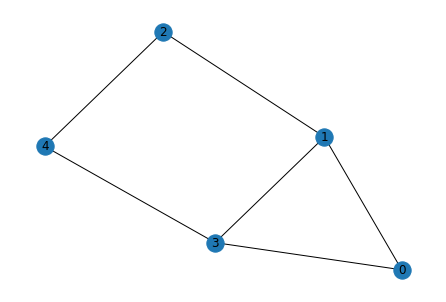

In [10]:
G = Graph()
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([(0,1),(0,3),(1,2),(1,3),(2,4),(3,4)])
draw(G, with_labels=True)

Veamos qué aspecto tiene el QUBO para este grafo:

In [11]:
qubo = obtener_QUBO(G)
qubo

BinaryQuadraticModel({'v0': -2.0, 'v1': -3.0, 'v3': -3.0, 'v2': -2.0, 'v4': -2.0}, {('v1', 'v0'): 2.0, ('v3', 'v0'): 2.0, ('v3', 'v1'): 2.0, ('v2', 'v1'): 2.0, ('v4', 'v3'): 2.0, ('v4', 'v2'): 2.0}, -0.0, 'BINARY')

Ahora calculamos la solución

In [12]:
sampler = obtener_sampler()
resultado = sampler.sample(qubo, num_reads=10)
print(resultado)

  v0 v1 v2 v3 v4 energy num_oc.
0  0  0  1  1  0   -5.0       1
1  1  0  1  1  0   -5.0       1
2  1  1  0  0  1   -5.0       1
3  1  1  0  0  1   -5.0       1
4  0  0  1  1  0   -5.0       1
5  0  1  0  0  1   -5.0       1
6  1  1  0  0  1   -5.0       1
7  0  1  0  0  1   -5.0       1
8  0  1  0  0  1   -5.0       1
9  1  1  0  0  1   -5.0       1
['BINARY', 10 rows, 10 samples, 5 variables]


In [13]:
#!dwave config create

Using the simplified configuration flow.
Try 'dwave config create --full' for more options.

Updating existing configuration file: /home/flav/.config/dwave/dwave.conf
Available profiles: defaults
Profile (select existing or create new) [defaults]: ^C
Unhandled error: 
